In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:30<00:00, 40.8MB/s]
100% 1.06G/1.06G [00:30<00:00, 37.0MB/s]


In [3]:
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [14]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
# generators -> image_dataset_from_directory
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
    )
valid_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
    )

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize-> Because we are getting numpy array from this generator
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image,label
train_ds = train_ds.map(process)
valid_ds = valid_ds.map(process)
# Now values will be between 0 - 255

In [7]:
# Create CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding = 'valid', activation = 'relu', input_shape= (256, 256, 3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [10]:
history = model.fit(train_ds, epochs = 10, validation_data = valid_ds)

Epoch 1/10
625/625 [==============================] - 65s 82ms/step - loss: 0.5972 - accuracy: 0.6686 - val_loss: 0.5474 - val_accuracy: 0.7284
Epoch 2/10
625/625 [==============================] - 55s 87ms/step - loss: 0.4753 - accuracy: 0.7729 - val_loss: 0.4658 - val_accuracy: 0.7864
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3488 - accuracy: 0.8434 - val_loss: 0.4932 - val_accuracy: 0.7952
Epoch 4/10
625/625 [==============================] - 53s 84ms/step - loss: 0.2039 - accuracy: 0.9166 - val_loss: 0.7202 - val_accuracy: 0.7858
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1098 - accuracy: 0.9602 - val_loss: 0.8973 - val_accuracy: 0.7812
Epoch 6/10
625/625 [==============================] - 58s 92ms/step - loss: 0.0702 - accuracy: 0.9762 - val_loss: 1.1589 - val_accuracy: 0.7940
Epoch 7/10
625/625 [==============================] - 55s 87ms/step - loss: 0.0565 - accuracy: 0.9819 - val_loss: 1.0878 - val_accuracy:

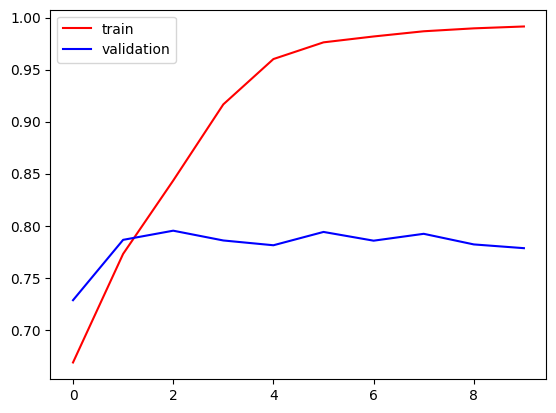

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color = "red", label = "train")
plt.plot(history.history["val_accuracy"], color = "blue", label = "validation")
plt.legend()
plt.show()

Clearly we can see that overfitting is there

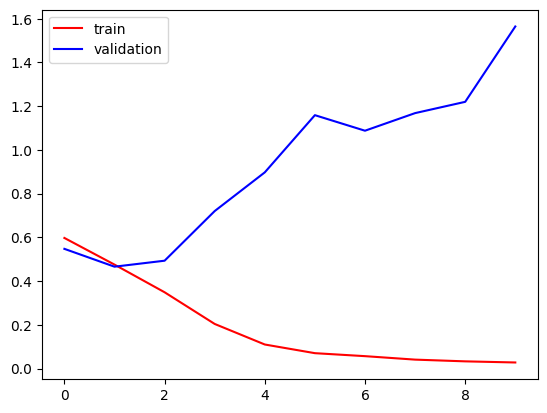

In [12]:
plt.plot(history.history["loss"], color = "red", label = "train")
plt.plot(history.history["val_loss"], color = "blue", label = "validation")
plt.legend()
plt.show()

Again we can see loss showing overfitting

In [13]:
# Ways to reduce overfitting

# Add more data
# Data augmentation
# L1/ L2 regularizer
# Dropout
# Batch norm
# Reduce complexity

In [15]:
# Create CNN model using droput and batchnormalization
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding = 'valid', activation = 'relu', input_shape= (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "sigmoid"))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [17]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [18]:
history = model.fit(train_ds, epochs = 10, validation_data = valid_ds)

Epoch 1/10
625/625 [==============================] - 74s 109ms/step - loss: 1.2807 - accuracy: 0.6104 - val_loss: 0.6146 - val_accuracy: 0.6754
Epoch 2/10
625/625 [==============================] - 71s 113ms/step - loss: 0.5548 - accuracy: 0.7196 - val_loss: 0.6980 - val_accuracy: 0.6214
Epoch 3/10
625/625 [==============================] - 82s 131ms/step - loss: 0.4963 - accuracy: 0.7661 - val_loss: 0.4935 - val_accuracy: 0.7586
Epoch 4/10
625/625 [==============================] - 75s 118ms/step - loss: 0.4124 - accuracy: 0.8144 - val_loss: 0.4350 - val_accuracy: 0.8106
Epoch 5/10
625/625 [==============================] - 72s 114ms/step - loss: 0.3599 - accuracy: 0.8388 - val_loss: 0.6047 - val_accuracy: 0.7374
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2913 - accuracy: 0.8776 - val_loss: 0.4530 - val_accuracy: 0.7954
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2194 - accuracy: 0.9093 - val_loss: 0.5493 - val_ac

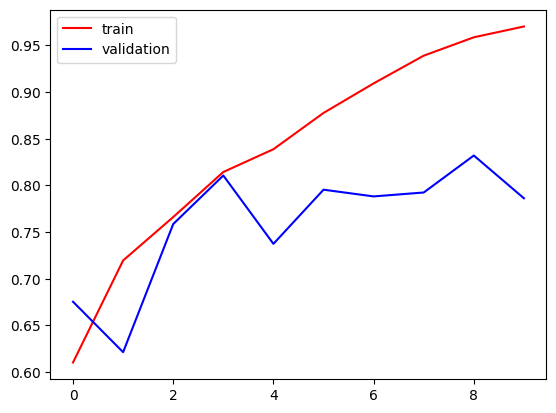

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color = "red", label = "train")
plt.plot(history.history["val_accuracy"], color = "blue", label = "validation")
plt.legend()
plt.show()

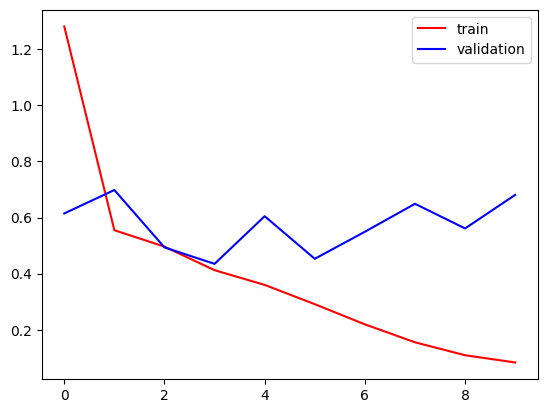

In [20]:
plt.plot(history.history["loss"], color = "red", label = "train")
plt.plot(history.history["val_loss"], color = "blue", label = "validation")
plt.legend()
plt.show()

Little improvement in lossand accuracy overfitting

In [21]:
import cv2

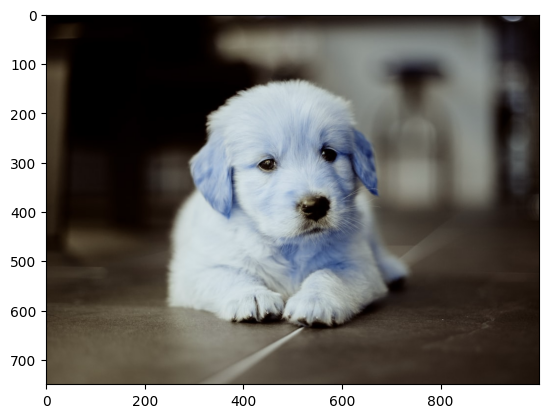

In [26]:
test_img = cv2.imread("/content/dog.jpeg")
plt.imshow(test_img)

In [28]:
# Resizing image
test_img = cv2.resize(test_img , (256, 256))
# Converting to 2D tensor/
test_input = test_img.reshape((1,256,256, 3))

In [29]:
model.predict(test_input)
# 1 -> Dog and 0 -> Cat

1/1 [==============================] - 0s 278ms/step


array([[1.]], dtype=float32)

Yes, 1-> Dog

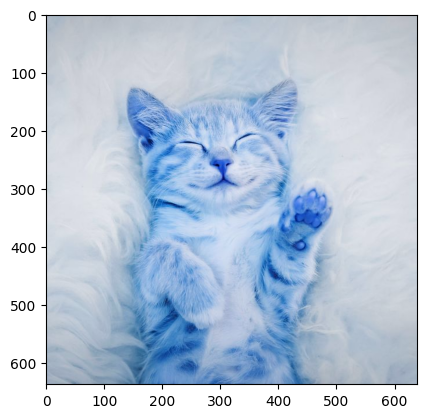

In [30]:
test_img = cv2.imread("/content/cat.jpg")
plt.imshow(test_img)

In [32]:
# Resizing image
test_img = cv2.resize(test_img , (256, 256))
# Converting to 2D tensor
test_input = test_img.reshape((1,256,256, 3))

In [33]:
model.predict(test_input)
# 1 -> Dog and 0 -> Cat

1/1 [==============================] - 0s 27ms/step


array([[0.]], dtype=float32)

Yes zero is for cats